<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Aprendizaje No Supervisado

Programa creado para mostrar ejemplos prácticos de los visto durante la clase<br>
v1.1

# Machine Learning not supervisado

## 1 - Supervisado vs No Supervisado

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from  sklearn import  datasets

In [2]:
iris=datasets.load_iris()
df_data = pd.DataFrame(data= iris.data, columns= iris.feature_names)
df_target = pd.DataFrame(data= iris.target, columns= ['species'])
df_target['species'] = df_target.apply(lambda x: 'setosa' if x.species == 0 else 'versicolor' if x.species == 1 else 'virginica', axis=1)
df = pd.concat([df_data, df_target], axis= 1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


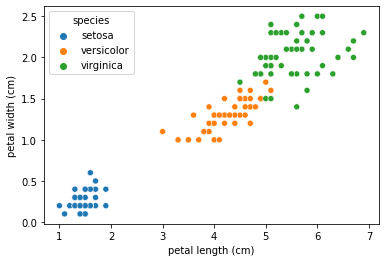

In [3]:
# El sistema supervisado tiene la ventaja de contar con la columna "species"
# para poder determinar el espacio que ocupa cada clase:
sns.scatterplot(x=df['petal length (cm)'], y=df['petal width (cm)'], hue=df['species'])
plt.show()

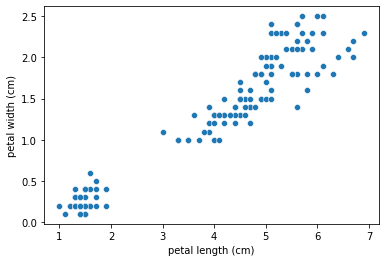

In [4]:
# En cambio, cuando trabajamos con algoritmos no supervisados es el caso
# cuando el sistema no nos brinda la columna "species" porque no la tenemos,
# no es posible categorizar por "labeling" (por nombre de clase) sino que hay
# clasificar por la distribución de los puntos en el espacio.
# Los datos crudos el algoritmo de clustering los veo como:
sns.scatterplot(x=df['petal length (cm)'], y=df['petal width (cm)'])
plt.show()

## 2 - Kmeans vs DBSCAN

#### Utilizar dataset de scikitlearn

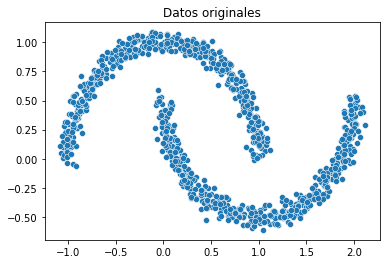

In [5]:
noisy_moons = datasets.make_moons(n_samples=1000, noise=.05)[0]
# Exploramos la distribución del dataset
fig = plt.figure()
ax = fig.add_subplot()
sns.scatterplot(x=noisy_moons[:, 0], y=noisy_moons[:, 1], ax=ax)
ax.set_title("Datos originales")
plt.show()

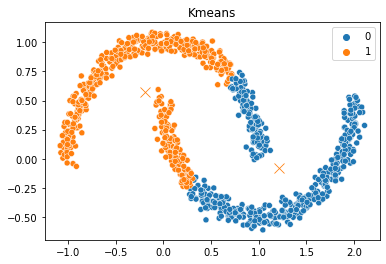

In [6]:
from sklearn.cluster import KMeans 
X = noisy_moons

kmeans = KMeans(init="k-means++", n_clusters=2, n_init = 12)
kmeans.fit(X)
kmeans_labels = kmeans.predict(X)

fig = plt.figure()
ax = fig.add_subplot()
sns.scatterplot(x=noisy_moons[:, 0], y=noisy_moons[:, 1], hue=kmeans_labels, ax=ax)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], marker='x', s=100, ax=ax)
ax.set_title("Kmeans")
plt.show()

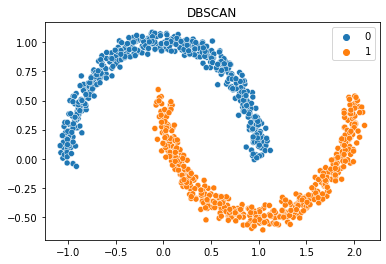

In [7]:
from sklearn.cluster import DBSCAN
X = noisy_moons

dbscan_labels = DBSCAN(eps=0.25, min_samples=10).fit_predict(X)

fig = plt.figure()
ax = fig.add_subplot()
sns.scatterplot(x=noisy_moons[:, 0], y=noisy_moons[:, 1], hue=dbscan_labels, ax=ax)
ax.set_title("DBSCAN")
plt.show()

#### Utilizar dataset de scikitlearn + ruido

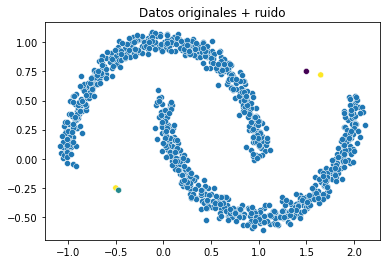

In [8]:
outliers = np.array([[-0.5, -0.25], [-0.47, -0.27], [1.5, 0.75], [1.65, 0.72]])
noisy_moons_outliers = np.concatenate((noisy_moons, outliers), axis=0)
# Exploramos la distribución del dataset
fig = plt.figure()
ax = fig.add_subplot()
sns.scatterplot(x=noisy_moons[:, 0], y=noisy_moons[:, 1], ax=ax)
sns.scatterplot(x=outliers[:, 0], y=outliers[:, 1], ax=ax)
ax.set_title("Datos originales + ruido")
plt.show()

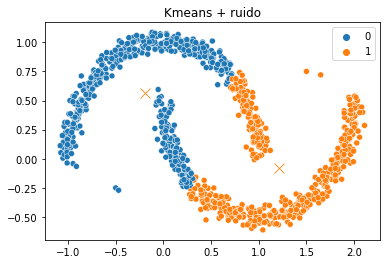

In [9]:
from sklearn.cluster import KMeans 
X = noisy_moons_outliers

kmeans = KMeans(init="k-means++", n_clusters=2, n_init = 12)
kmeans.fit(X)
kmeans_labels = kmeans.predict(X)

fig = plt.figure()
ax = fig.add_subplot()
sns.scatterplot(x=noisy_moons_outliers[:, 0], y=noisy_moons_outliers[:, 1], hue=kmeans_labels, ax=ax)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], marker='x', s=100, ax=ax)
ax.set_title("Kmeans + ruido")
plt.show()

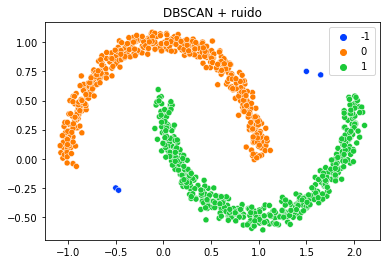

In [10]:
from sklearn.cluster import DBSCAN
X = noisy_moons_outliers

dbscan_labels = DBSCAN(eps=0.25, min_samples=10).fit_predict(X)

fig = plt.figure()
ax = fig.add_subplot()
sns.scatterplot(x=noisy_moons_outliers[:, 0], y=noisy_moons_outliers[:, 1], hue=dbscan_labels, palette='bright', ax=ax)
ax.set_title("DBSCAN + ruido")
plt.show()